# Part II C3 Petrology - Practical 20: MORB Global Systematics
*John Maclennan (jcm1004@cam.ac.uk), Lent 2025*

In this practical you will extract and analyse geochemical and geophysical data for the global mid-ocean ridge system with the aim of identifying what the primary controls on the composition of MORB are. The practical will also demonstrate how we can use computers and relatively simple python scripts to handle large datasets efficiently and perform otherwise time consuming calculations.

All the practicals in this part of the course are contained in Jupyter Notebooks which can be run in the cloud. In this case, we will use Google Colab, but other cloud-based servers such as Binder are available. This means they should work on *any* computer, provided it has a modern web browser. The notebooks allow you to run code alongside text and images and allow you to conveniently save the output from the code. Whole scientific papers (e.g. https://mybinder.org/v2/gh/kaylai/vesical-binder/HEAD?filepath=Manuscript.ipynb) can be written in Jupyter Notebooks! **However, all the work you do is stored on a server in the cloud and will disappear when you shut the window, so make sure you download a copy!** To do this, click `File` in the top-left corner, and find `Save a copy in Drive` on the menu that appears. This means that you can work on your own copy in your own Google Drive space.

A summary of the practical will be available online after the end of the practical class, but don't rely on this, use the demonstrators! Some of the tasks are deliberately designed to require discussions with other students and the demonstrators.

## 1. Retrieving and plotting bathymetry data using pyGMT
There are multiple ways of interacting with these datasets but we will use a package called pyGMT, which is a python interface to the GMT ([Generic Mapping Tools](https://www.generic-mapping-tools.org/)) software. GMT is widely used in Earth and Marine Sciences. You can read more about the bathymetry data [here](https://www.gmrt.org/).

In order to get GMT to work on Colab we need to run some installation. This may take about 10 minutes, so do this first.

After importing pyGMT we will extract some of the data GMT is packaged with and assign it to variables so that we can use it more conveniently.

The first dataset is a grid of altitude/bathymetry covering the whole planet

In [2]:
import pygmt


from pyrolite.util.classification import TAS
from pyrolite.util.synthetic import normal_frame, random_cov_matrix


2025-03-10 10:54:47,078 pyrolite.util.plot.helpers - WARNING: scikit-learn not installed


Now we will extract some of the data GMT is packaged with and assign it to variables so that we can use it more conveniently.

The first dataset is a grid of altitude/bathymetry covering the whole planet

In [3]:
grid = pygmt.datasets.load_earth_relief()
grid

<xarray.DataArray 'z' (lat: 181, lon: 361)> Size: 261kB
array([[ 2865. ,  2865. ,  2865. , ...,  2865. ,  2865. ,  2865. ],
       [ 3088. ,  3087.5,  3087. , ...,  3088.5,  3088. ,  3088. ],
       [ 3100.5,  3100.5,  3101. , ...,  3101.5,  3101. ,  3100.5],
       ...,
       [-3745.5, -3731. , -3723. , ..., -3734. , -3741.5, -3745.5],
       [-2939.5, -2945. , -2950.5, ..., -2895. , -2921. , -2939.5],
       [-3861. , -3861. , -3861. , ..., -3861. , -3861. , -3861. ]],
      shape=(181, 361), dtype=float32)
Coordinates:
  * lat      (lat) float64 1kB -90.0 -89.0 -88.0 -87.0 ... 87.0 88.0 89.0 90.0
  * lon      (lon) float64 3kB -180.0 -179.0 -178.0 -177.0 ... 178.0 179.0 180.0
Attributes:
    Conventions:       CF-1.7
    title:             SRTM15 Earth Relief v2.6 at 01 arc degree
    history:           
    description:       IGPP Earth relief
    long_name:         elevation (m)
    units:             meters
    vertical_datum:    EGM96
    horizontal_datum:  WGS84

The second dataset records the location of spreading ridges:

In [4]:
points = pygmt.datasets.load_sample_data(name='ocean_ridge_points')
points

,longitude,latitude
0,-32.2971,37.4118
1,-32.3909,37.1394
2,-32.6448,37.1760
3,-32.7066,37.0349
4,-32.9468,37.0643
...,...,...
4141,-77.6612,-45.7623
4142,-76.6762,-45.6414
4143,-75.8527,-45.5741
4144,-75.7026,-46.0728


Now we can combine both of these datasets to extract the bathymetry along the ridge axes:

In [5]:
track = pygmt.grdtrack(points=points, grid=grid, newcolname="bathymetry")
track

,longitude,latitude,bathymetry
0,-32.2971,37.4118,-1853.357284
1,-32.3909,37.1394,-1901.349818
2,-32.6448,37.1760,-1861.936168
3,-32.7066,37.0349,-1878.921621
4,-32.9468,37.0643,-1866.656444
...,...,...,...
4141,-77.6612,-45.7623,-2974.976535
4142,-76.6762,-45.6414,-2842.512517
4143,-75.8527,-45.5741,-2039.141760
4144,-75.7026,-46.0728,-1629.750756


Let's see what this looks like on a map:



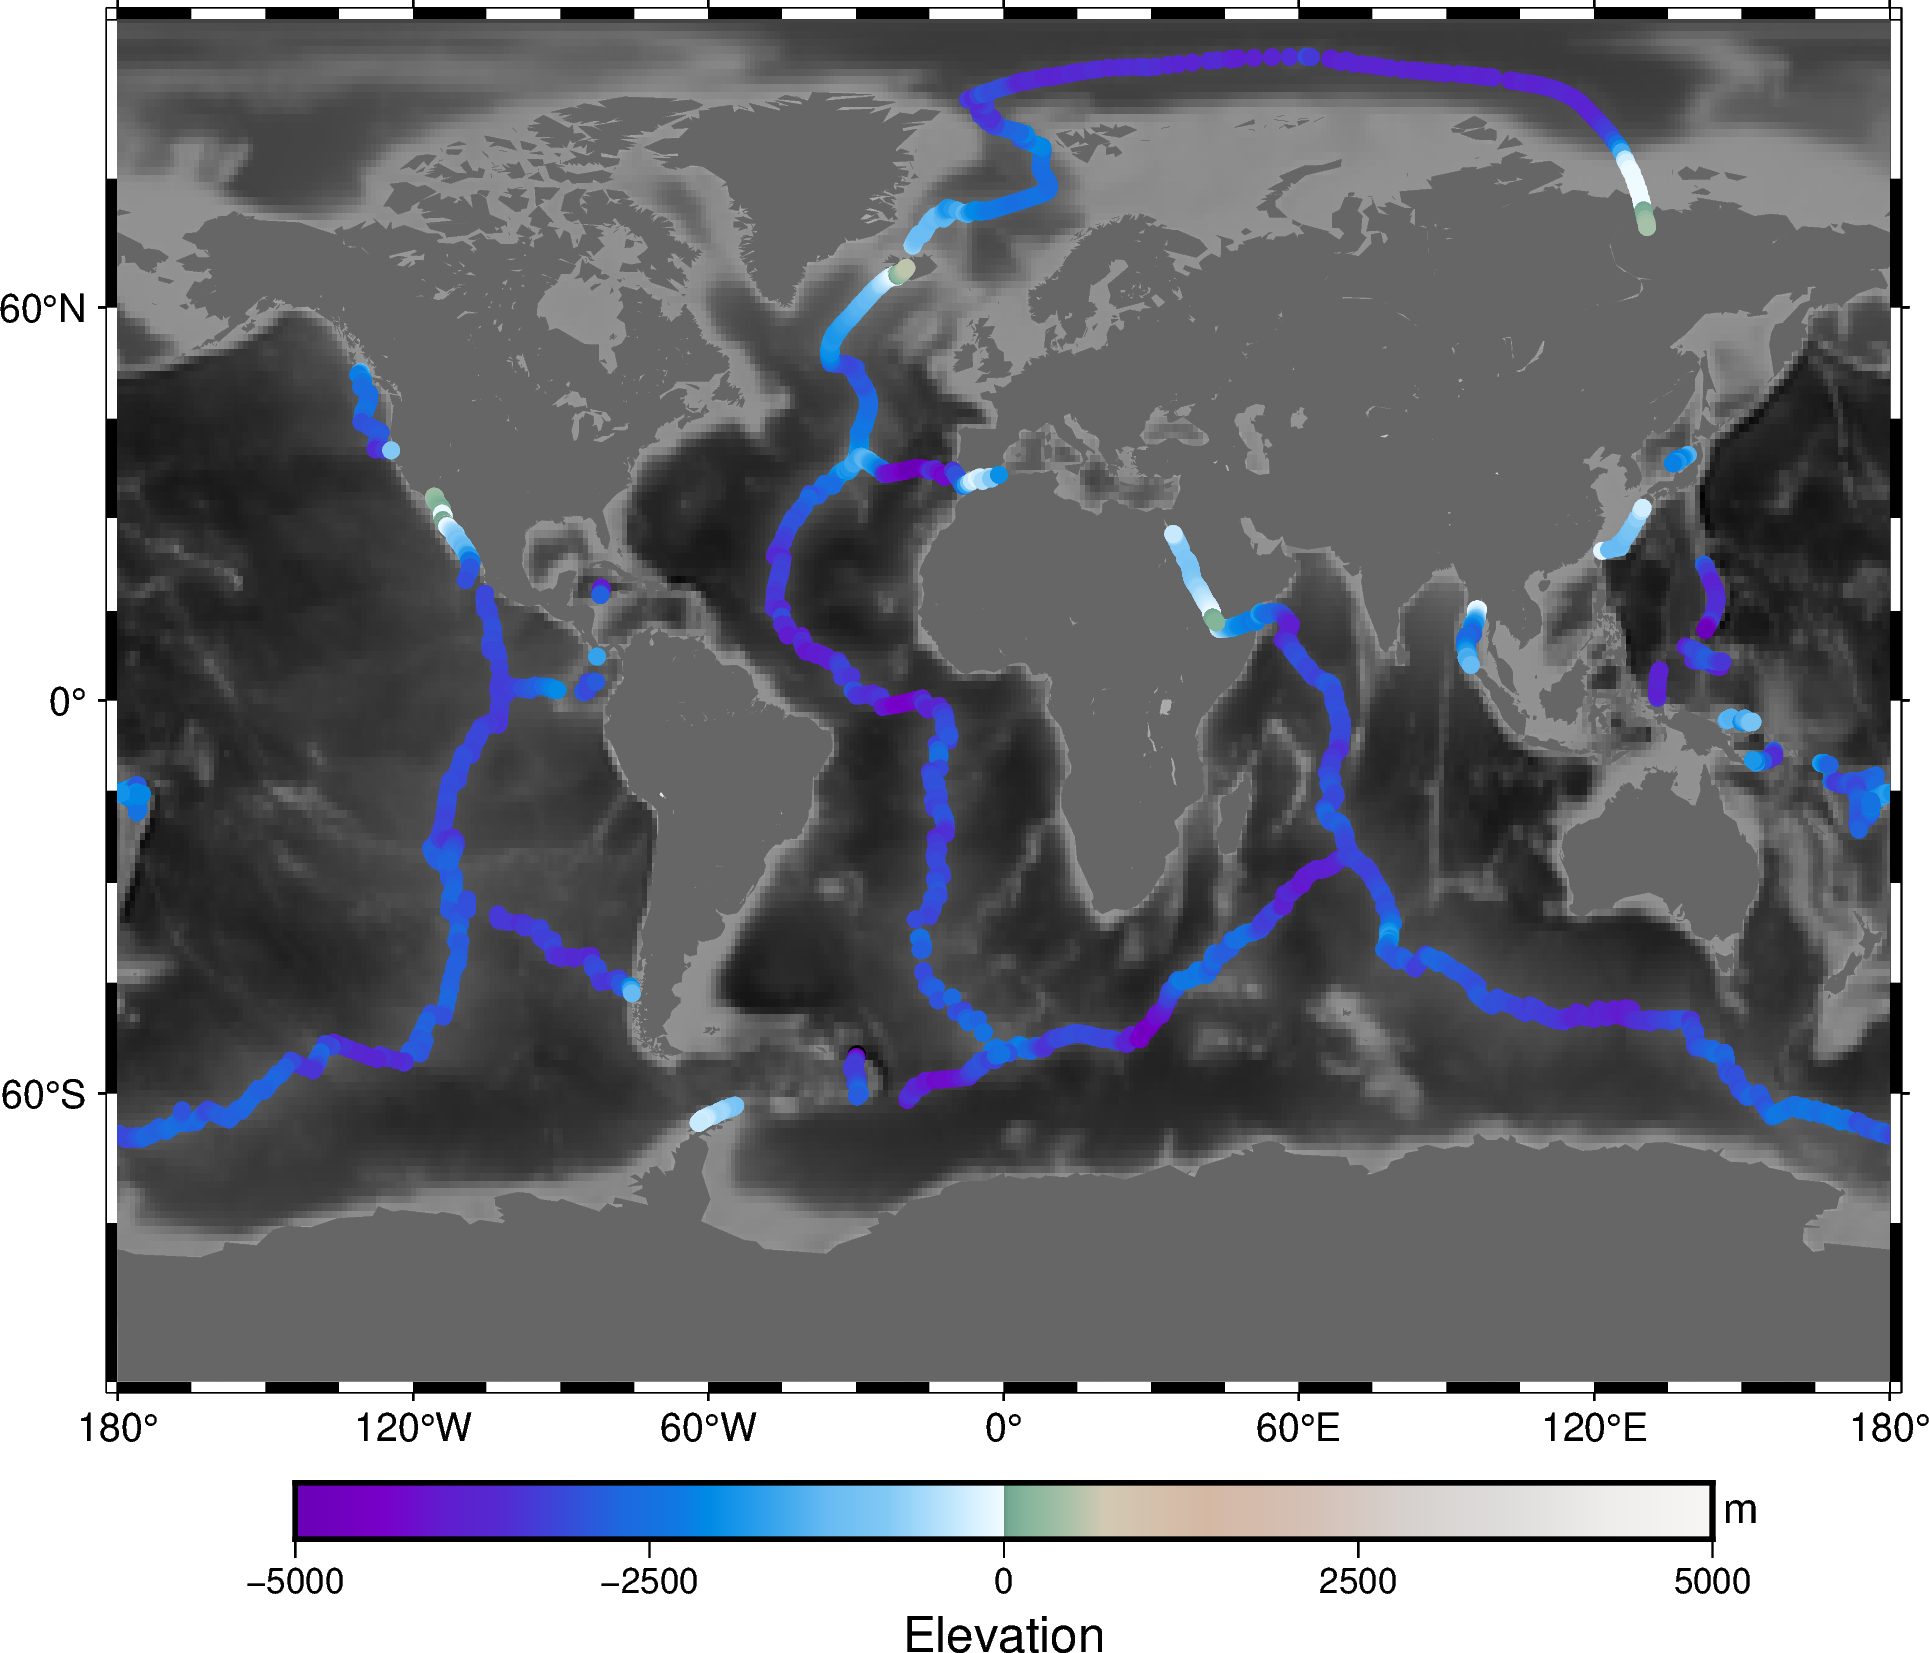

In [6]:
# Create a GMT figure and store it in variable fig:
fig = pygmt.Figure()

# Plot the earth relief grid on Cylindrical Stereographic projection
fig.basemap(region="g", frame=True, projection="Cyl_stere/0/45/15c") # this sets the projection and the region and the size of the plot (15cm)
fig.grdimage(grid=grid, cmap="gray") # the plots up the ocean bathymetry with a boring gray colour scale
fig.coast(land="#666666") # Mask land areas

# Generate a color map for the bathymetry
pygmt.makecpt(cmap='terra', series=[-5000, 5000])

# Plot using circles (c) of 0.15 cm, the sampled bathymetry points
# Points are colored using elevation values (normalized for visual purposes)
fig.plot(
    x=track.longitude,
    y=track.latitude,
    style="c0.15c",
    cmap=True, # Use the colormap generated above
    fill=track.bathymetry, # Colour according to bathymetry
)
fig.colorbar(frame=["a2500", "x+lElevation", "y+lm"])
fig.show()

You should visit the [pygmt](https://www.pygmt.org/latest/) manual pages and look at the information about [projections](https://www.pygmt.org/latest/projections/index.html) and [setting the region](https://www.pygmt.org/latest/tutorials/regions.html) to get a quick feel for what the `projection` and `region` arguments mean. Please ask if this does not make sense.

Most of the plots we make in these practicals (and probably when you use python to make plots in general) uses a library called **matplotlib**. Unfortunately, pyGMT works quite differently to matplotlib, and (in my opinion) is far less intuitive than matplotlib. It does produce much higher quality maps and provides us with convenient access to bathymetry datasets, so it is worth the extra hassle!

## 2. Extract and plot chemical data for oceanic basalts from PETDB

In the practical folder is a spreadsheet containing a large compilation of chemical data collected from rocks at present-day spreading ridges. The spreadsheet was downloaded from the [EarthChem](https://www.earthchem.org/) website and is based on the PETDB database which is part of EarthChem. Follow the links to the PETDB search page. Try running a search for some part of the Earth, and have a look at the data that is returned.

### Q2.1: What categories of rocks in the database are likely to be the most and least useful for understanding magmatic processes? Ask a demonstrator if you're not sure where to find this information.

*Your answer here...*

The **pandas** python package provides a toolkit for importing and manipulating large datasets:

In [7]:
import pandas as pd

Adding `as pd` after the import command means that we can access all the functions using the name `pd`, saving us from typing out `pandas` each time!

We can use pandas to read in an Excel file (telling it to skip the first 5 rows which hold a title and some information from PETDB):

In [8]:
petdb = pd.read_excel("spreading_ridge_rocks.xlsx", header=5)

You might be wondering where the file is! We need to upload it somewhere that this Colab sheet can see in a directory structure. One way of doing this is by going to the small folder button on the left, clicking, then selecting the "upload to session storage" option - a file with an up arrow icon.

It's always a good idea to check the data import has worked correctly, so we can look at the very top of the table:

In [9]:
petdb.head()

,SAMPLE ID,IGSN,EXPEDITION ID,REFERENCES,LATITUDE,LONGITUDE,LOC PREC,MIN ELEVATION,MAX ELEVATION,TECTONIC SETTING,...,FEO,FEOT,NIO,MNO,MGO,CAO,NA2O,K2O,P2O5,LOI
0,*VG1586,NaN,nr,"MELSON, 2003",5.60,61.89,0.01,-2360.0,-2820.0,SPREADING_CENTER,...,NaN,9.640,NaN,NaN,7.75,10.76,2.97,0.10,0.11,NaN
1,*VG968,NaN,nr,"ITO, 1980",28.90,-43.32,0.01,-3692.0,-3701.0,SPREADING_CENTER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.04,NaN,NaN
2,078_I5.27N,NaN,nr,"COHEN, 1982",5.45,61.83,0.01,NaN,NaN,SPREADING_CENTER,...,10.06,NaN,NaN,0.02,8.47,10.95,3.19,0.08,NaN,NaN
3,09N039W-UDM-HOST,NaN,nr,"SOBOLEV, 1993",9.00,-39.50,0.10,NaN,NaN,SPREADING_CENTER,...,NaN,9.200,NaN,0.20,8.10,11.80,2.58,0.10,NaN,NaN
4,108DR1,NaN,nr,"PRINZHOFER, 1989",11.43,-104.00,0.01,NaN,NaN,SPREADING_CENTER,...,NaN,9.068,NaN,0.14,7.80,11.89,2.91,0.12,NaN,NaN


While this gives us a convenient view, it skips some of the columns. To see all of the columns that exist in the table:

In [10]:
petdb.columns

Index(['SAMPLE ID', 'IGSN', 'EXPEDITION ID', 'REFERENCES', 'LATITUDE',
       'LONGITUDE', 'LOC PREC', 'MIN ELEVATION', 'MAX ELEVATION',
       'TECTONIC SETTING', 'MIN AGE', 'AGE', 'MAX AGE', 'METHOD',
       'ANALYZED MATERIAL', 'ROCK TYPE', 'ROCK NAME', 'MINERAL', 'SIO2',
       'TIO2', 'AL2O3', 'CR2O3', 'FE2O3', 'FE2O3T', 'FEO', 'FEOT', 'NIO',
       'MNO', 'MGO', 'CAO', 'NA2O', 'K2O', 'P2O5', 'LOI'],
      dtype='object')

Importantly for us, we have the latitude, longitude, and the oxide composition (in wt%).

### Q2.2: How have the columns FE2O3, FE2O3T, FEO, and FEOT been populated in the spreadsheet, and what is their meaning?

*Your answer here...*

To plot the data in this part of the practical we will use matplotlib, which is conventially imported like this:

In [11]:
import matplotlib.pyplot as plt

We can plot the whole dataset at once, which will allow us to check data quality as well as get an overview of it. Here is an example of one plot using matplotlib, with a little bit of customisation:

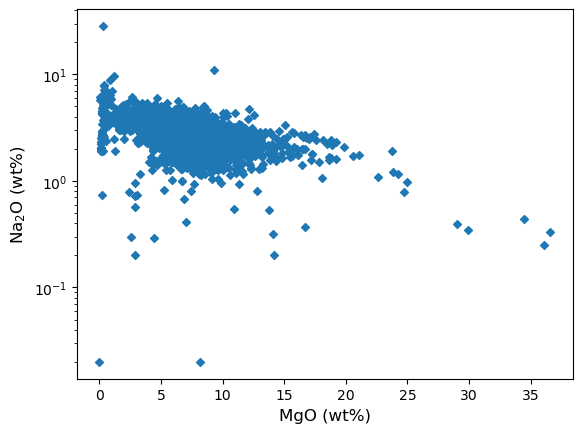

In [12]:
fig, ax = plt.subplots() # Make a figure, and put a set of axes on it, set the display resolution as 350 DPI.

# Add some scatter points to the axis
ax.scatter(petdb.MGO, petdb.NA2O)

# Set the axis labels (notice how you make a subscript appear):
ax.set_xlabel('MgO (wt%)')
ax.set_ylabel('Na$_2$O (wt%)')

# log y

plt.yscale("log")

# Display the plot
plt.show()

The things you can do to customise how matplotlib displays a plot are virtually endless. Have a look at the [matplotlib examples gallery](https://matplotlib.org/stable/gallery/index) to get an idea for this.

### Q2.3: Do you notice any issues with the data?

*You might want to change the plot settings to zoom into parts of the dataset. You can do this with the lines `ax.set_xlim(..., ...)` and `ax.set_ylim(..., ...)`.*

There is possibly some erraneious data, e.g. the high Na2O data

We should bear these issues in mind when we start using the dataset. They might be things we can ignore, or we might want to filter the data before we use it.

### Q2.4: Is there any pattern you notice in the global dataset when MgO is plotted against Na$_2$O?

Generally invesely correlated

### Q2.5: Produce versions of the plot coloured for longitude and latitude

*To add a colour scale to the points you can use the argument `c=...` where you enter the sequence of data in place of "...". Try working out how to do this from the code above, and ask a demonstrator if you get stuck.*

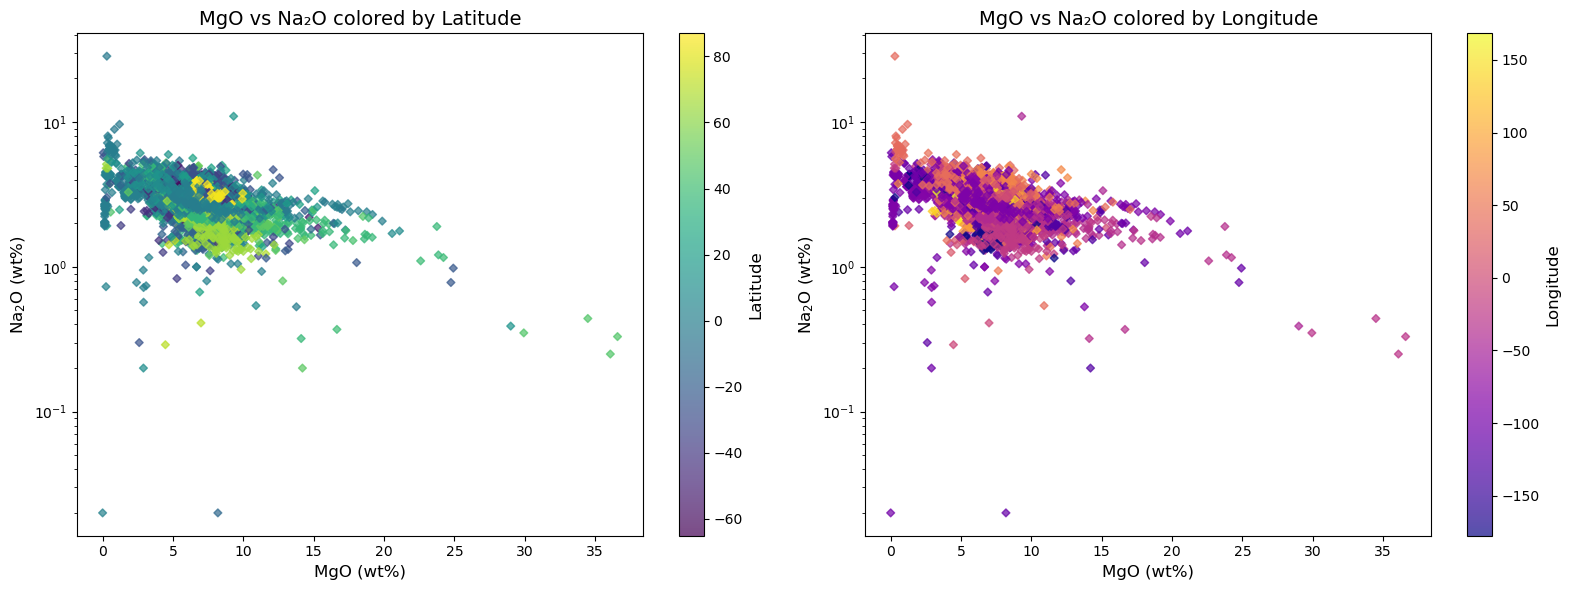

In [13]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6), dpi=100)

scatter1 = ax1.scatter(petdb.MGO, petdb.NA2O, c=petdb.LATITUDE, cmap='viridis', alpha=0.7)
ax1.set_xlabel('MgO (wt%)', fontsize=12)
ax1.set_ylabel('Na$_2$O (wt%)', fontsize=12)
ax1.set_yscale("log")
cbar1 = plt.colorbar(scatter1, ax=ax1)
cbar1.set_label('Latitude', fontsize=12)
ax1.set_title('MgO vs Na₂O colored by Latitude', fontsize=14)

scatter2 = ax2.scatter(petdb.MGO, petdb.NA2O, c=petdb.LONGITUDE, cmap='plasma', alpha=0.7)
ax2.set_xlabel('MgO (wt%)', fontsize=12)
ax2.set_ylabel('Na$_2$O (wt%)', fontsize=12)
ax2.set_yscale("log")
cbar2 = plt.colorbar(scatter2, ax=ax2)
cbar2.set_label('Longitude', fontsize=12)
ax2.set_title('MgO vs Na₂O colored by Longitude', fontsize=14)

plt.tight_layout()
plt.show()

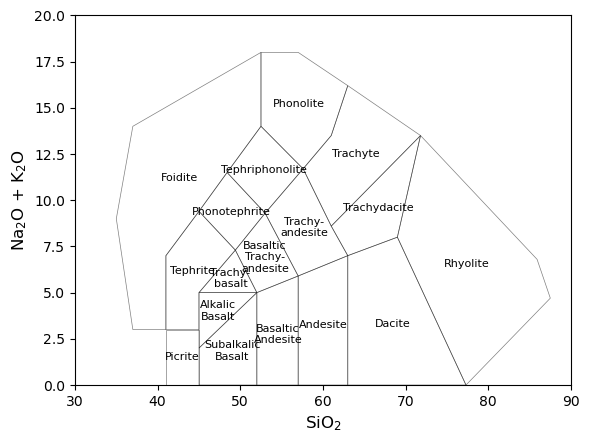

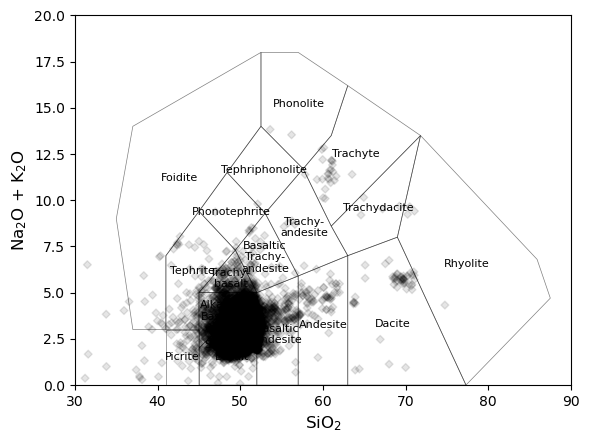

In [14]:
# First, create the Na2O + K2O column
petdb["Na2OK2O"] = petdb.NA2O + petdb.K2O  # Assuming K2O exists in your dataset
# Create figure and axis
cm = TAS()

fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True, which_labels="volcanic")
plt.show()

fig, ax = plt.subplots(1)
cm.add_to_axes(ax, alpha=0.5, linewidth=0.5, zorder=-1, add_labels=True, which_labels="volcanic")
petdb[["SIO2", "Na2OK2O"]].pyroplot.scatter(ax=ax, c="k", alpha=0.1, axlabels=False)
plt.show()

Though its tricky to pick out all the data on these plots, you should notice that there is some systematic variation between where the data sits in Na$_2$O vs MgO and its location.

### Q2.6: Perhaps a better way of viewing it is to colour code the symbols on a map. Repurpose the code from Section 1 that produced the global map to show chemical variations.

*The colormap used above is great for plotting topography and bathymetry, but not so great for other variables. Find a better one by using the [GMT colour scale reference](https://docs.generic-mapping-tools.org/latest/cookbook/cpts.html#built-in-color-palette-tables-cpt)*

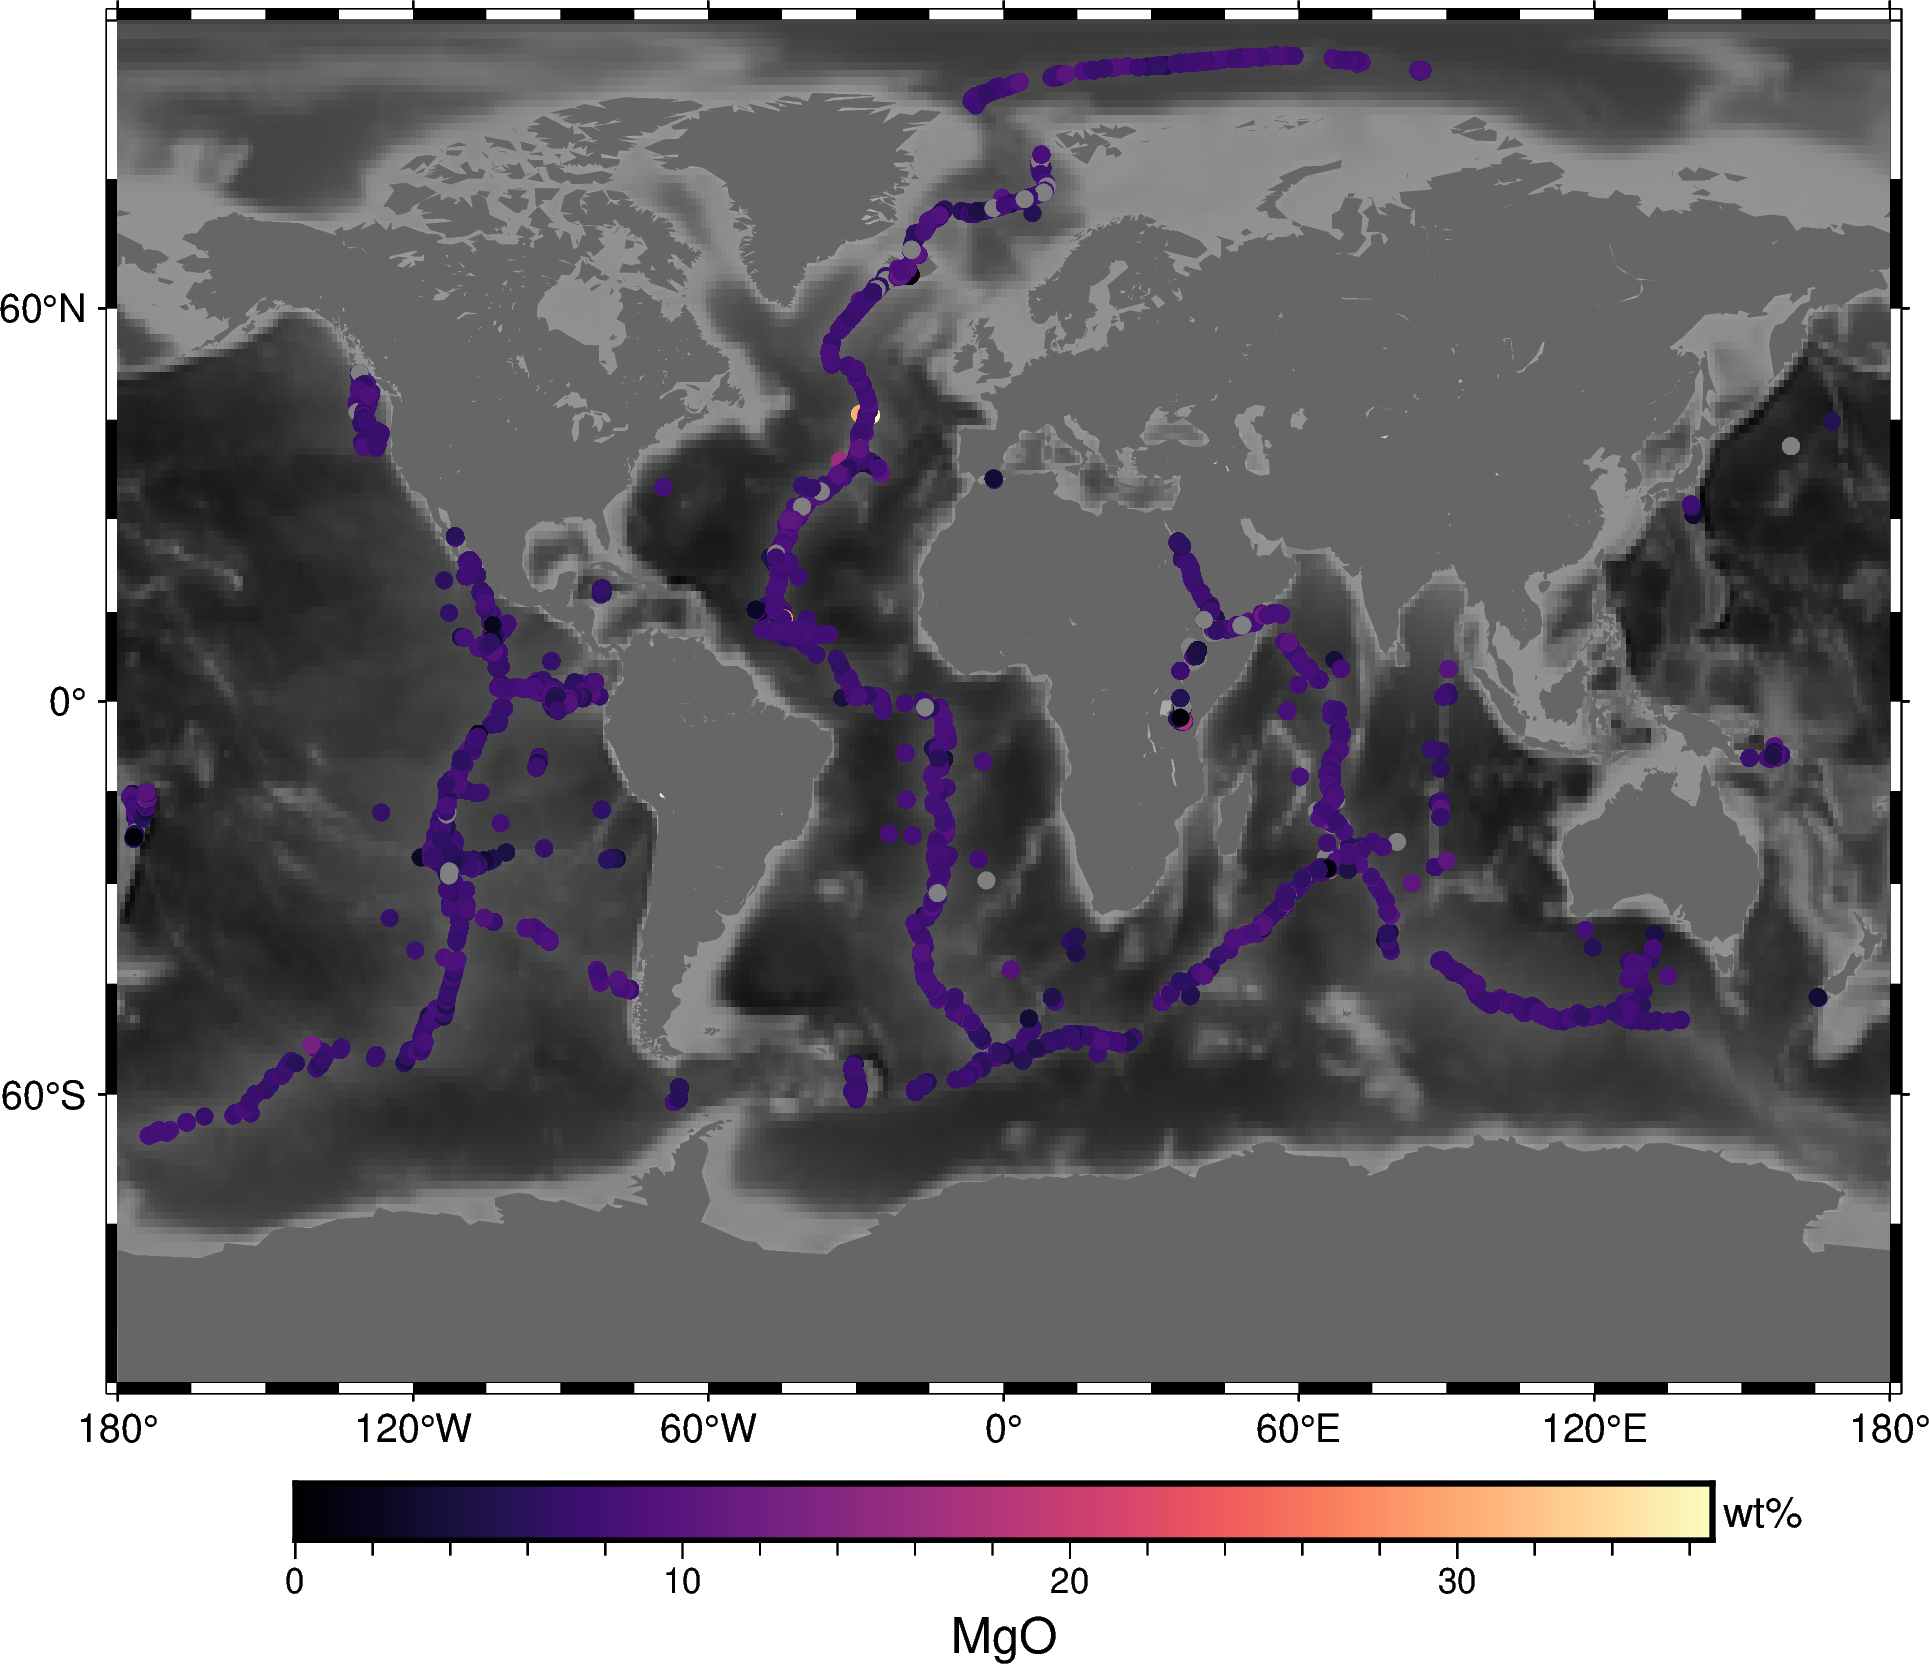

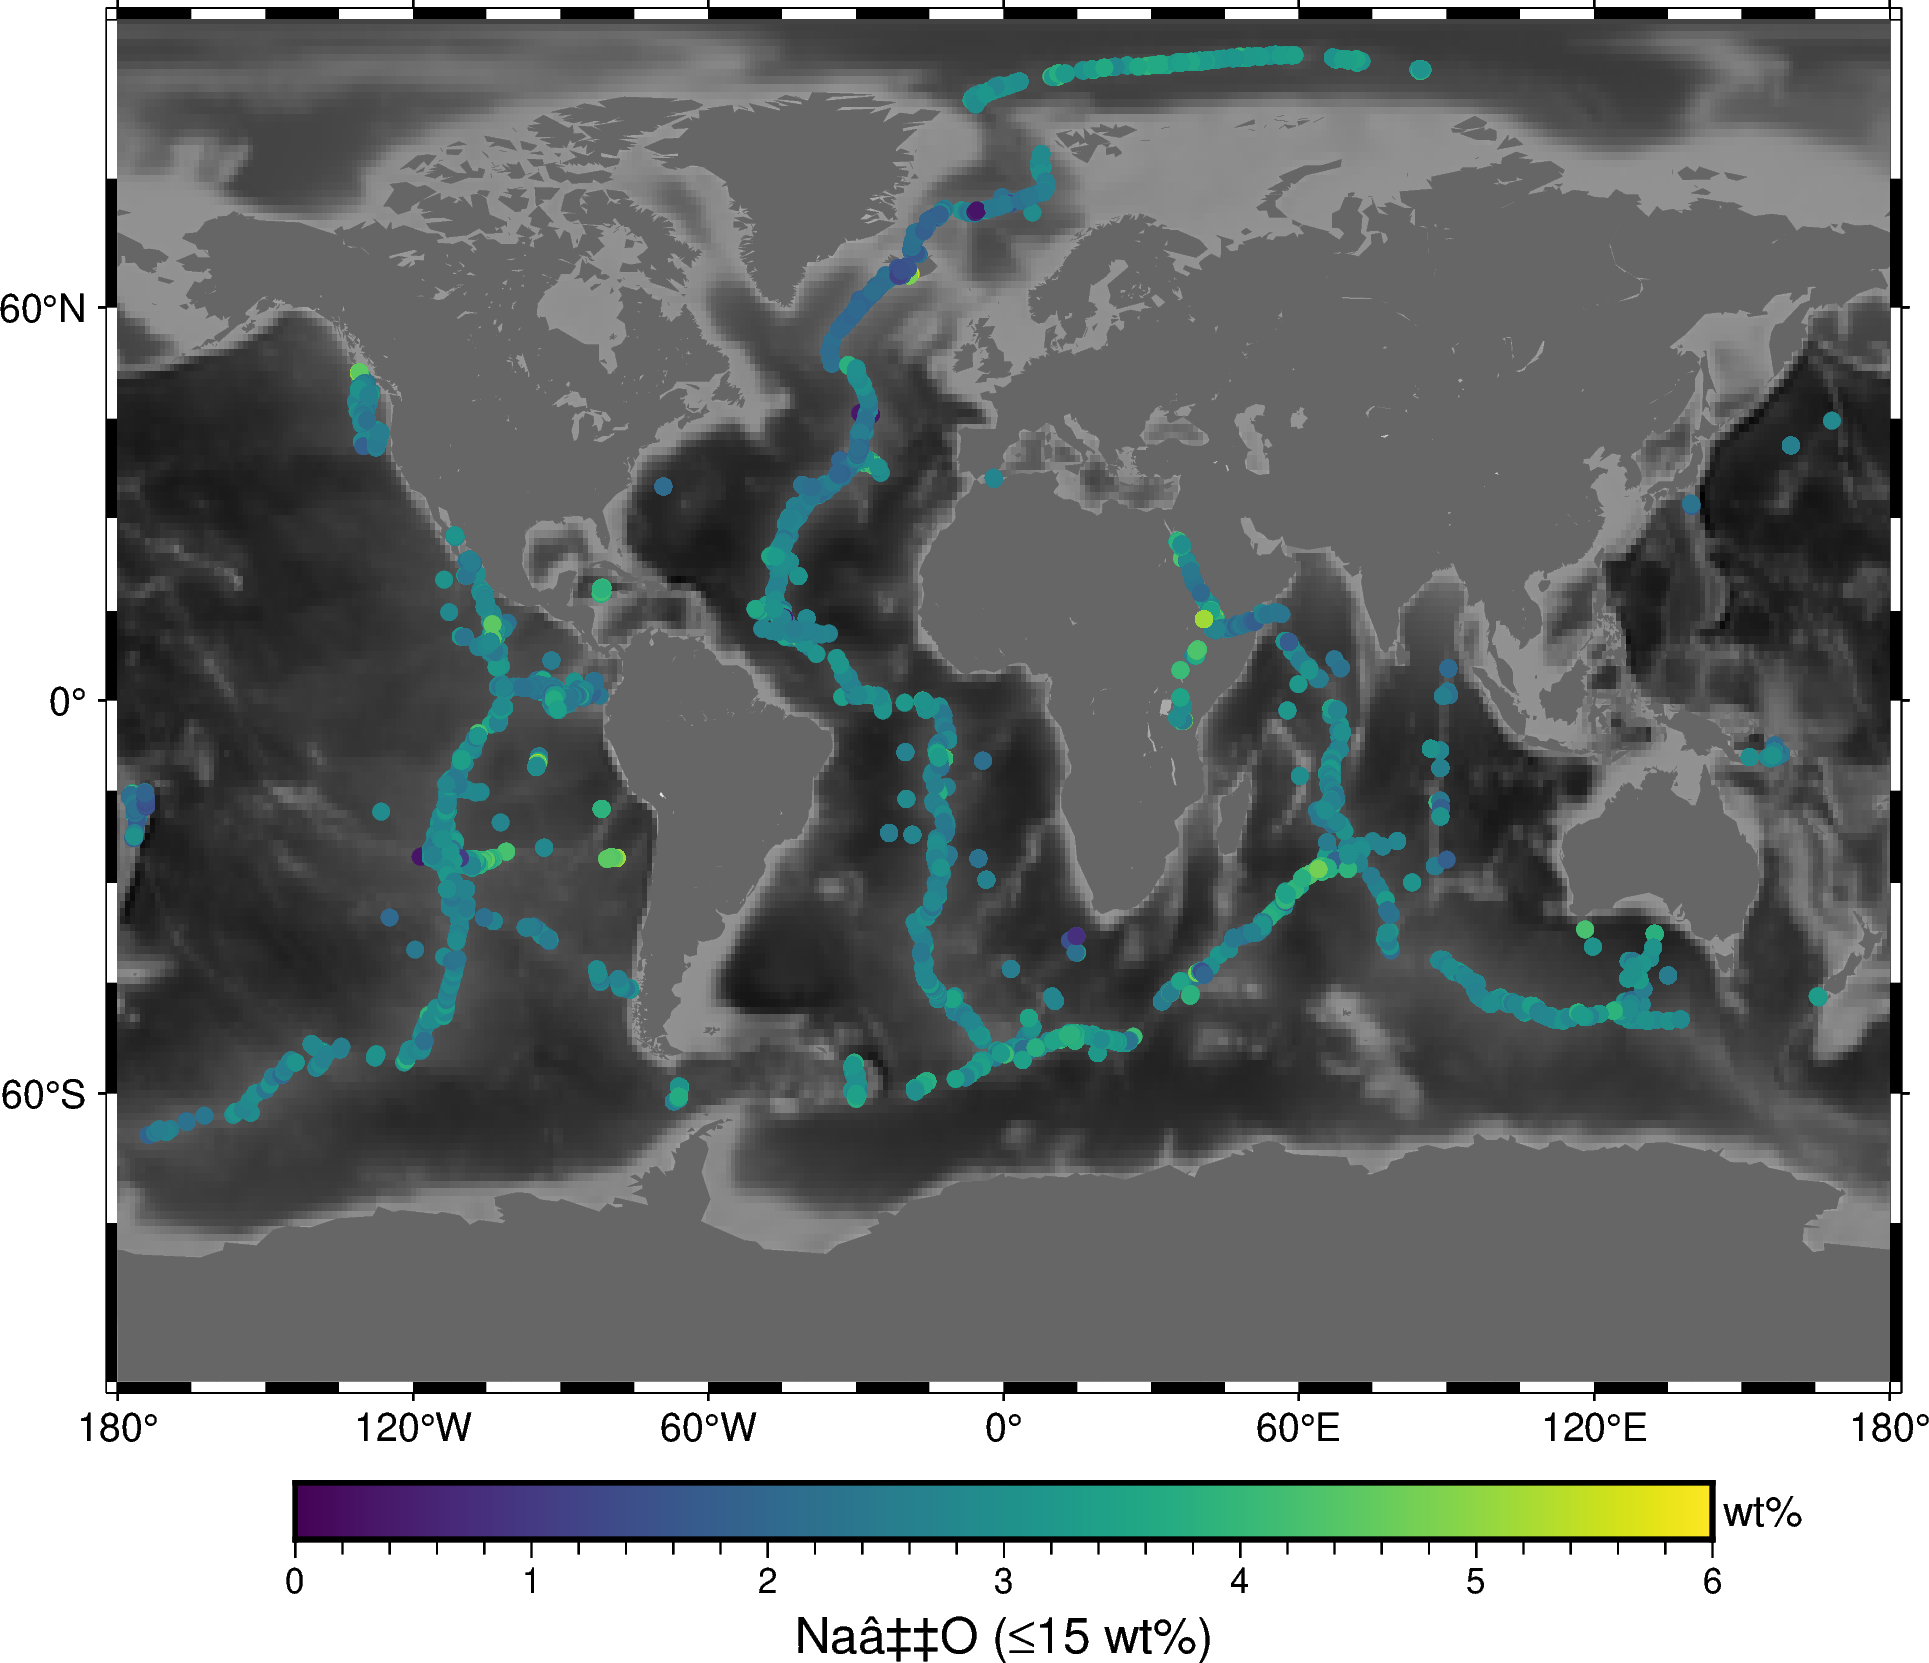

In [ ]:
# First plot for MgO distribution
fig_mgo = pygmt.Figure()
fig_mgo.basemap(region="g", frame=True, projection="Cyl_stere/0/45/15c")
fig_mgo.grdimage(grid=grid, cmap="gray")
fig_mgo.coast(land="#666666")  # Mask land areas

# Generate a color map for MgO
pygmt.makecpt(cmap='magma', series=[petdb.MGO.min(), petdb.MGO.max()])

# Plot MgO data points
fig_mgo.plot(
    x=petdb.LONGITUDE,
    y=petdb.LATITUDE,
    style="c0.15c",
    cmap=True,
    fill=petdb.MGO
)
# Corrected colorbar syntax
fig_mgo.colorbar(frame=["af", "x+lMgO", "y+lwt%"])
fig_mgo.text(position="TC", text="MgO Distribution", font="12p,Helvetica-Bold", offset="0/1c")
fig_mgo.show()

# Second plot for Na2O distribution (filtered to ≤ 15)
fig_na2o = pygmt.Figure()
fig_na2o.basemap(region="g", frame=True, projection="Cyl_stere/0/45/15c")
fig_na2o.grdimage(grid=grid, cmap="gray")
fig_na2o.coast(land="#666666")  # Mask land areas

# Filter Na2O values to only include those ≤ 15
filtered_petdb = petdb[petdb.NA2O <= 6]

# Generate a color map for the filtered Na2O values
pygmt.makecpt(cmap='viridis', series=[filtered_petdb.NA2O.min(), 6])

# Plot filtered Na2O data points
fig_na2o.plot(
    x=filtered_petdb.LONGITUDE,
    y=filtered_petdb.LATITUDE,
    style="c0.15c",
    cmap=True,
    fill=filtered_petdb.NA2O
)
# Colorbar with appropriate limits
fig_na2o.colorbar(frame=["af", "x+lNa₂O (≤15 wt%)", "y+lwt%"])
fig_na2o.text(position="TC", text="Na₂O Distribution (values ≤15 wt%)", font="12p,Helvetica-Bold", offset="0/1c")
fig_na2o.show()

### Q2.7 Is there any coherence between Na<sub>2</sub>O content and bathymetry? Any noteable extremes? Why?

Under iceland much lower Na2O ... higher temp?

## 3. Controls on the Na$_2$O concentration in MORB

You should have found some systematic pattern between Na<sub>2</sub>O and bathymetry. If you didn't, speak to a demonstrator. This section will explore this relationship in a bit more detail and in a more rigorous fashion.

These relationships between the major element composition of MORB and geophysical indicators of the extent of melting (such as crustal thickness or depth of seafloor at the spreading ridge axis) were used by Charlie Langmuir and co-workers to argue for the presence of a global array in MORB composition that is controlled by mantle properties (e.g. [Klein & Langmuir, JGR, 1987](https://agupubs.onlinelibrary.wiley.com/doi/epdf/10.1029/JB092iB08p08089)).

In order to isolate chemical variations associated with mantle, rather than crustal, processes these authors devised a chemical property known as Na<sub>8</sub>. Take a look at their Figure 1a and the surrounding text to see how this property is defined and used.

### Q3.1: Briefly describe why comparison of Na<sub>8</sub> between different parts of the spreading ridge system should provide a clearer picture of mantle melting variations than the use of Na<sub>2</sub>O from above.

*Your answer here...*

### Q3.2: Why is it better to average over rift segments rather than using individual rock compositions and the bathymetry at the point they were collected?

*Your answer here...*

In the rest of the practical we will use the up-to-date datasets we imported above to produce a new version of the Na<sub>8</sub> -- bathymetry array. I will demonstrate how we might do this for one segment first...

To start with we will look at the Reykjanes Ridge, just to the south of Iceland. We will use a version of the plots above (combined with some data filtering) to extract representative values for the bathymetry and Na<sub>8</sub>.

First, we can plot a map of the bathymetry for this segment. Notice we can use a higher resolution version of the bathymetry grid. To see the range of resolutions that GMT can call on, look at [the documentation page here](https://docs.generic-mapping-tools.org/6.0/datasets/earth_relief.html). We will also plot the locations of the rock samples in the database for the segment. To do this we must filter the database by location:

In [24]:
## In PetDB, longitude goes from -180 to +180.
petsam = petdb[(petdb.LONGITUDE > -26.5) & (petdb.LONGITUDE < -24.5) & (petdb.LATITUDE > 62.) & (petdb.LATITUDE < 63.)]

grdblend [NOTICE]: Remote data courtesy of GMT data server oceania [http://oceania.generic-mapping-tools.org]
grdblend [NOTICE]: SRTM15 Earth Relief v2.6 original at 15x15 arc seconds [Tozer et al., 2019].
grdblend [NOTICE]:   -> Download 10x10 degree grid tile (earth_relief_15s_p): N60W030


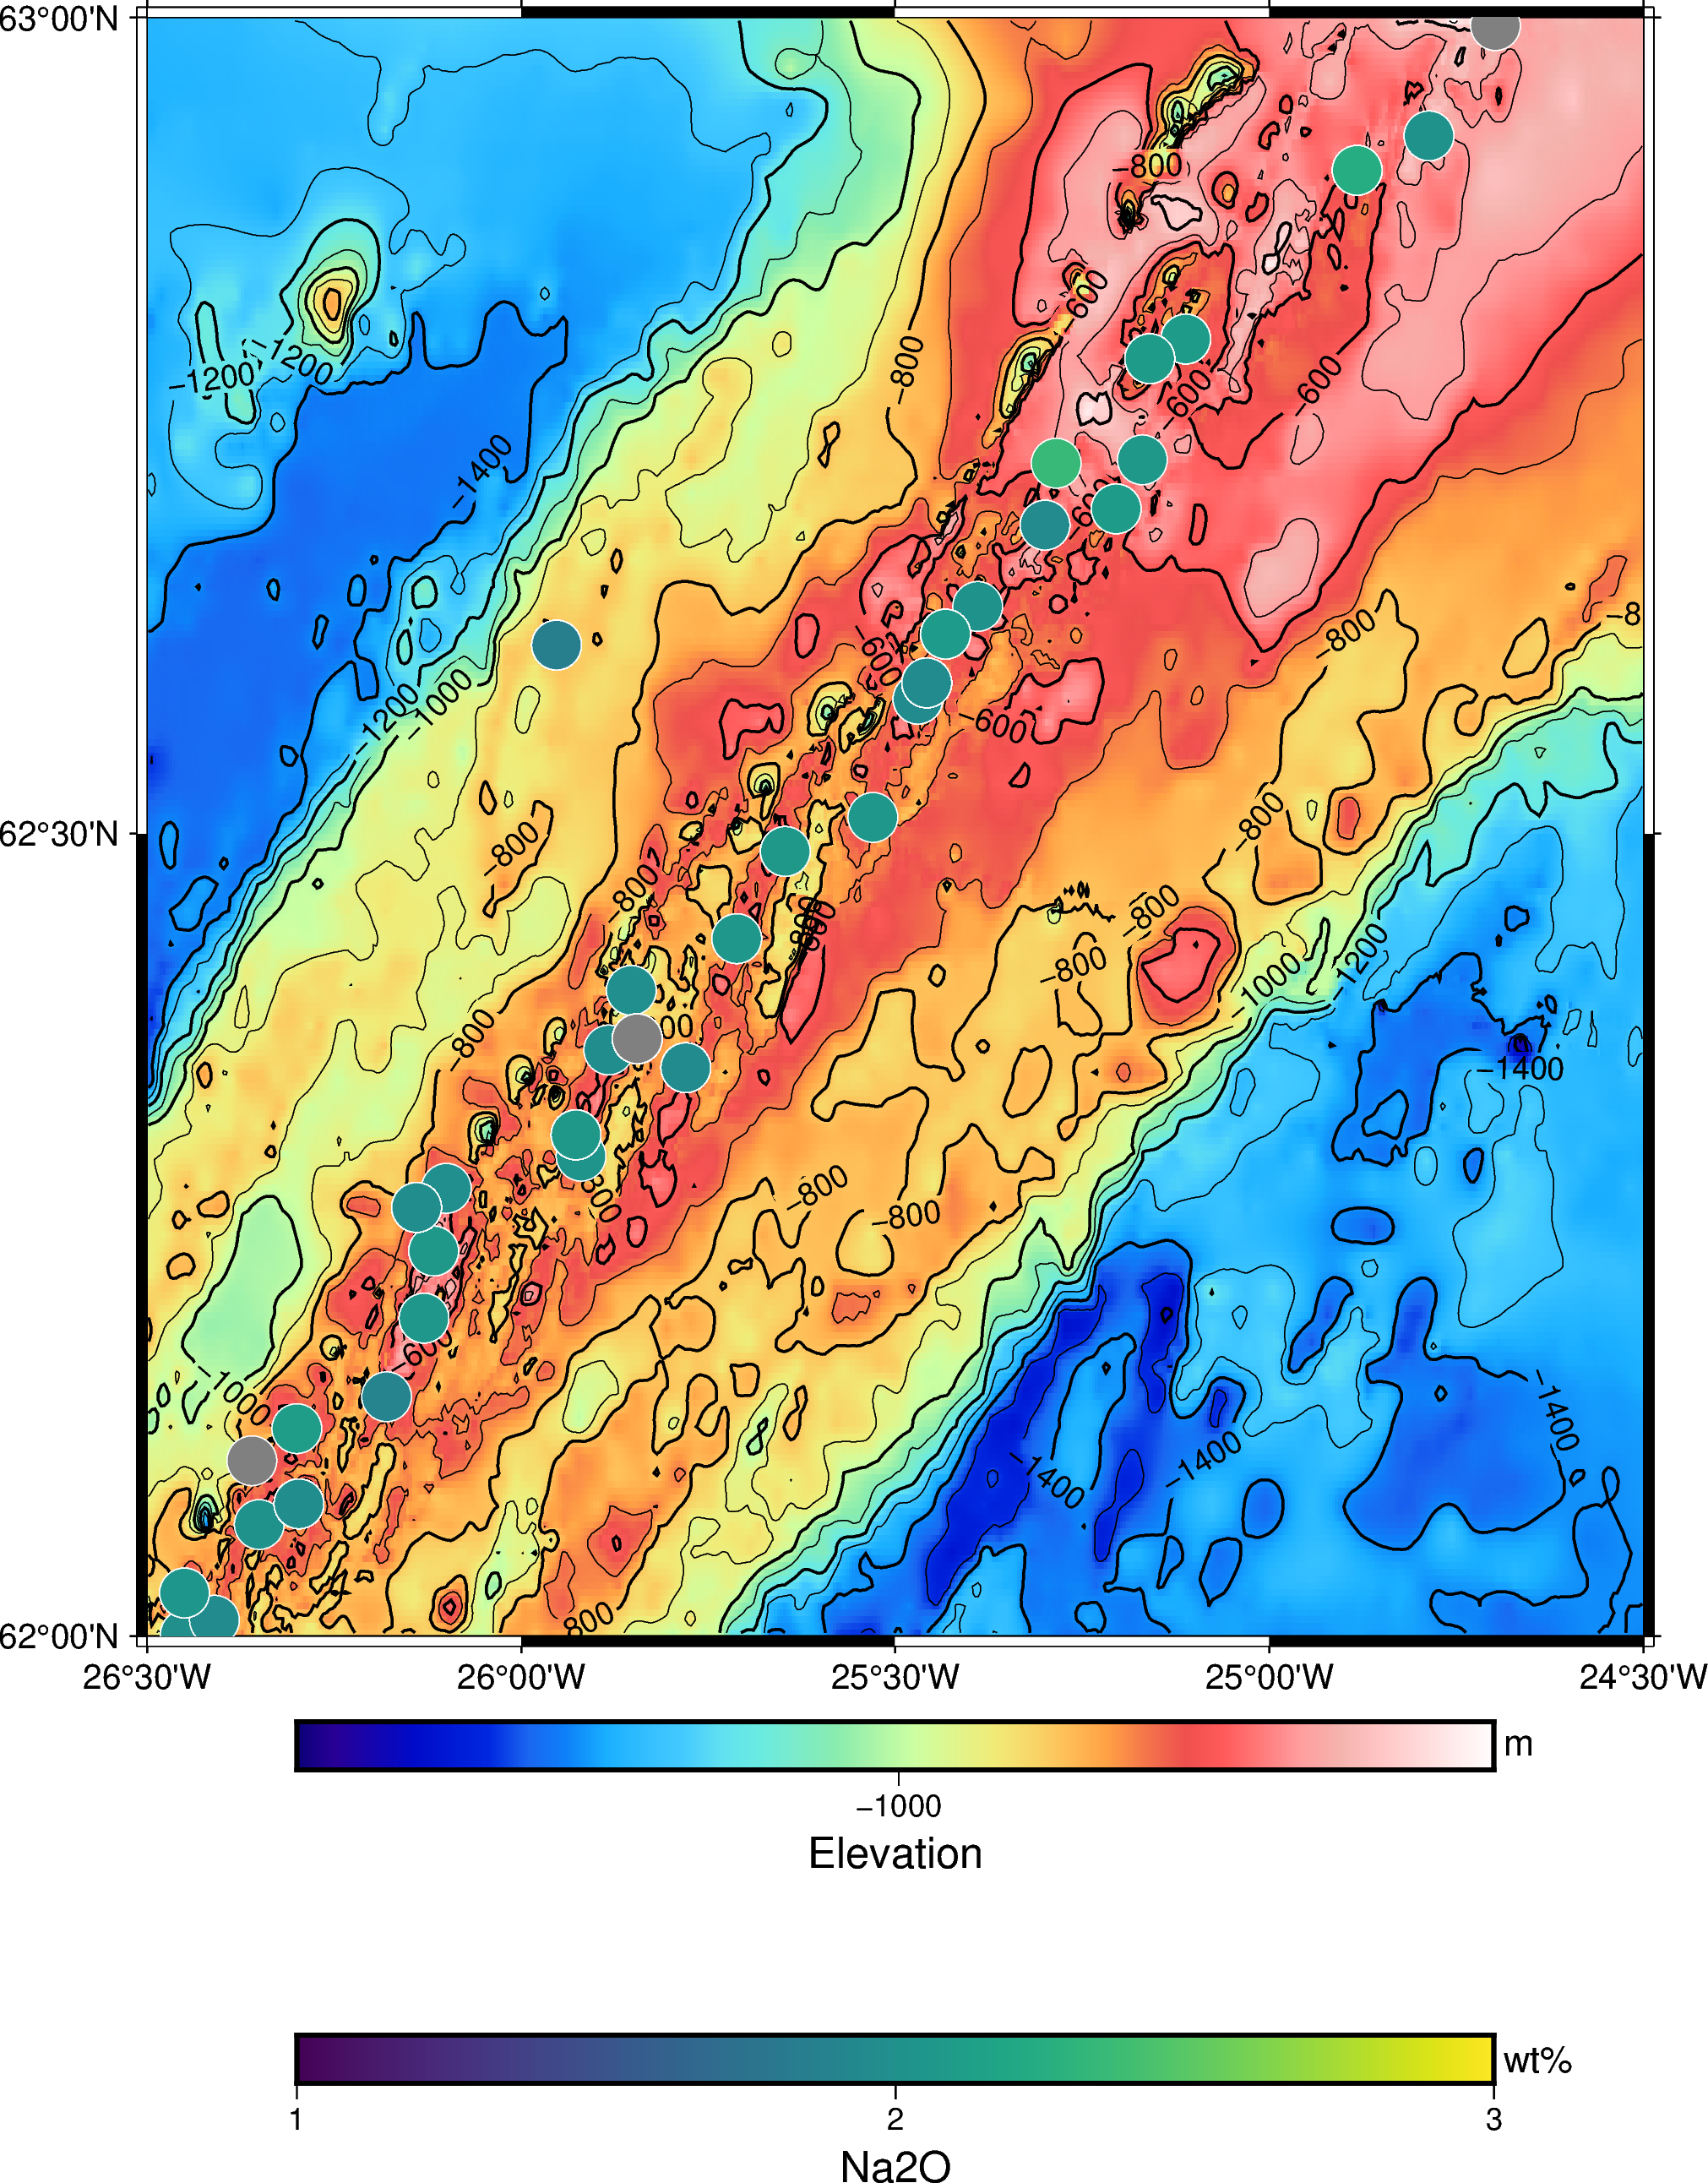

In [28]:
## first of all, make another data grid using a subset of the global data.
## The region defines the longitude and latitude bounds in the order WESN
## The resolution is 01m - which is 1 arcminute grid spacing. This should be sufficient
grid = pygmt.datasets.load_earth_relief(resolution="15s", region=[-26.5, -24.5, 62, 63])



fig = pygmt.Figure()
fig.grdimage(grid=grid, projection="M15c", frame="a", cmap="haxby") # haxby is a colorscale that is OK for oceans
fig.grdcontour(grid=grid) # plot up contours
fig.colorbar(frame=["a1000", "x+lElevation", "y+lm"])
pygmt.makecpt(cmap="viridis", series=[1., 3.], background = "i") # color scale for Na2O - change series limits
# Plot using circles (c) of 0.5 cm, the sampled bathymetry points

fig.plot(
    x=petsam.LONGITUDE,
    y=petsam.LATITUDE,
    style="c0.5c",
    pen="white",
    cmap=True,
    fill=petsam.NA2O, # fill circle according color-scale
)


fig.colorbar(frame=["a1.0", "x+lNa2O", "y+lwt%"],position="JBC+o0c/4c")
fig.show()


So, this has generated a contoured and coloured bathymetry chart of the region of interest, along with the position of available basalt samples, these colour-coded by their Na<sub>2</sub>O contents. You can put the map in context by comparing to a global plot from GMT, the [GMRT website](https://www.gmrt.org/) or even Google Earth.


Now we need to estimate Na<sub>8</sub> for the segment, which we could also by eye from a plot:

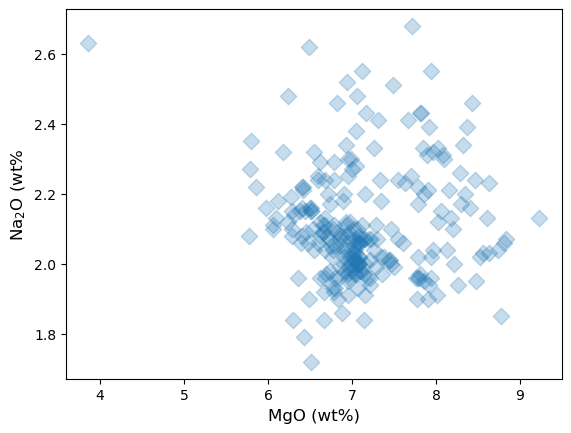

In [29]:
f, a = plt.subplots()

a.scatter(petsam.MGO, petsam.NA2O, alpha=0.25, s=70)

a.set_xlabel('MgO (wt%)')
a.set_ylabel('Na$_2$O (wt%')

plt.show()

In [30]:
petsam["NA8"] = petsam.NA2O + (0.373*petsam.MGO) - 2.98

/var/folders/95/2m34wf_d5d39c_426mkcgcbw0000gn/T/ipykernel_96709/1046204895.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  petsam["NA8"] = petsam.NA2O + (0.373*petsam.MGO) - 2.98


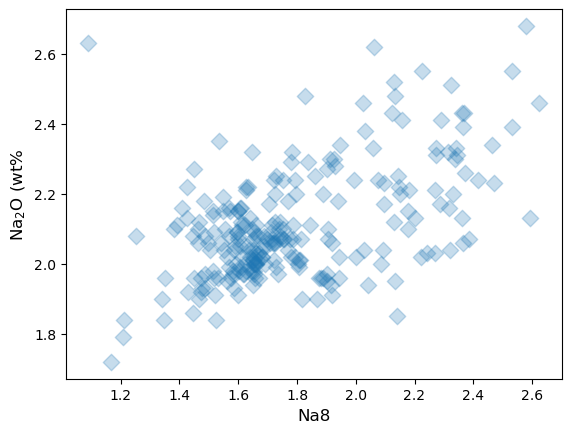

In [31]:
f, a = plt.subplots()

a.scatter(petsam.NA8, petsam.NA2O, alpha=0.25, s=70)

a.set_xlabel('Na8')
a.set_ylabel('Na$_2$O (wt%')

plt.show()

Notice on the plot above that each symbol is slightly transparent. I did this to see how dense the data is- there are many points overlapping with each other in a big cluster.

### Q3.3: Estimate (by eye) a value for Na<sub>8</sub> for this data.

*Your answer here...*

We could also do this a bit more rigorously by regressing the data to MgO = 8 wt%. A really simple way to do this is to run a linear regression over the whole dataset. Of course, someone has already written code that can do this in python, and made it available in a python package SciPy, which we can import here:

In [32]:
from scipy.stats import linregress
import numpy as np

In this case I import a specific function from the library, rather than the whole library (as we did for pandas, for example). I also imported the library numpy, which provides lots of useful mathematical operations, and lets us define matrices etc.

We can look up how to use the linregress function with a handy Jupyter Lab trick:

In [33]:
linregress?

Signature: linregress(x, y=None, alternative='two-sided')
Docstring:
Calculate a linear least-squares regression for two sets of measurements.

Parameters
----------
x, y : array_like
    Two sets of measurements.  Both arrays should have the same length N.  If
    only `x` is given (and ``y=None``), then it must be a two-dimensional
    array where one dimension has length 2.  The two sets of measurements
    are then found by splitting the array along the length-2 dimension. In
    the case where ``y=None`` and `x` is a 2xN array, ``linregress(x)`` is
    equivalent to ``linregress(x[0], x[1])``.

    .. deprecated:: 1.14.0
        Inference of the two sets of measurements from a single argument `x`
        is deprecated will result in an error in SciPy 1.16.0; the sets
        must be specified separately as `x` and `y`.
alternative : {'two-sided', 'less', 'greater'}, optional
    Defines the alternative hypothesis. Default is 'two-sided'.
    The following options are available:

 

Let's try running it:

In [34]:
linregress(petsam.MGO, petsam.NA2O)

LinregressResult(slope=np.float64(nan), intercept=np.float64(nan), rvalue=np.float64(nan), pvalue=np.float64(nan), stderr=np.float64(nan), intercept_stderr=np.float64(nan))

Urgh! It didn't work. It turns out this is because some of the samples in the dataset have empty entries for some of the oxides. We could have filtered this out when we selected the data earlier, or we can do this when we call the function:

In [35]:
linreg_result = linregress(petsam.MGO[(petsam.MGO>0)&(petsam.NA2O>0)], petsam.NA2O[(petsam.MGO>0)&(petsam.NA2O>0)])
linreg_result

LinregressResult(slope=np.float64(-0.0017564779583879257), intercept=np.float64(2.122959602580933), rvalue=np.float64(-0.00760025470063828), pvalue=np.float64(0.9067573433665418), stderr=np.float64(0.014980059401239797), intercept_stderr=np.float64(0.10747636856256196))

We can see what this regression looks like by adding it to the plot below:

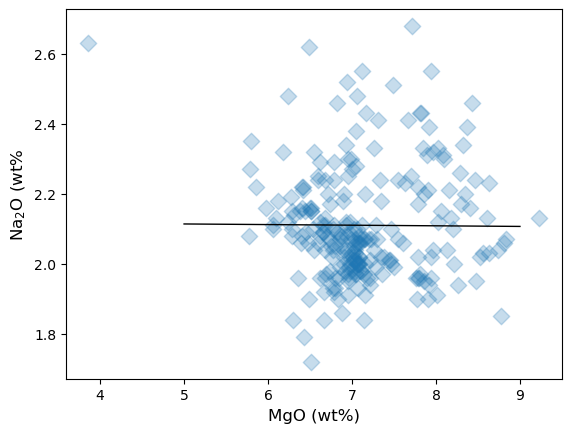

In [43]:
f, a = plt.subplots()

a.scatter(petsam.MGO, petsam.NA2O, alpha=0.25, s=70)

x = np.array([5, 9])
y = linreg_result[0] * x + linreg_result[1]

a.plot(x, y, c='k')

a.set_xlabel('MgO (wt%)')
a.set_ylabel('Na$_2$O (wt%')

plt.show()

### Q3.4: How does this compare with the gradient of the lines used by Klein & Langmuir? Do you think this is a reliable way of estimating Na<sub>8</sub>?

*Your answer here...*

The table below lists some spreading centres which will help us build a global axial depth - Na<sub>8</sub> array. How you populate this is **up to you**, but I suggest you work together as a class, each taking one segment (or work in pairs).

The Reykjanes peninsula has already been filled in with my favoured values, but maybe you disagree? If you disagree by much, speak to a demonstrator.


| Segment Name |	Longitude W |Longitude E | Latitude S | Latitude N | Crustal Thickness (km)| Axial Depth (m) | Na<sub>8</sub> |
|  :-:         | :-:            | :-:        | :-:        | :-:        | :-:                   | :-: | :-: |
| Reykjanes Example | -26.5 | -24.5 | 62.0 | 63.0 | 12 | 700 | 1.9 |
| EPRR10 |	-104.4 |	-104.2 |	9.1 | 	10.1	| 6 | ? | ? |
| JUAN8 |	-129.5	| -128.9	| 46.54	| 47.5	| 7 | ? | ? |
| GALA6	| -97.8	| -96.5	| 2.1	| 2.2	| 5.5 |? | ? |
| GALA11 |	-92.1 |	-90.8 |	1.85 |	2.15 |	8 |? | ? |
| MARR23 |	-18.4 |	-17.6 |	67.9 |	68.9 |	9.5 |? | ? |
| MARR24 |	-18.8 |	-18.5 |	66.9 |	67.9 |	12 |? | ? |
| MARR86 |	-32.4 |	-32.2 |	37 |	37.5 |	6 |? | ? |
| SWIR67SWIR66 |	68 |	69.9 |	-26.4 |	-25.6 |	3.5 |? | ? |
| GAKK15 |	0 |	2.8 |	84.1 |	84.5 |	4 |? | ? |
| SEIR40 |	100.2 |	101.4 |	-47.7 |	-47.2 |	6 |? | ? |
| SEIR56SEIR57 | 116.5 | 117.1 | -49.4 | -49.2	|4 |? | ? |

I've provided code to produce a plot with the values, once you have entered them here:

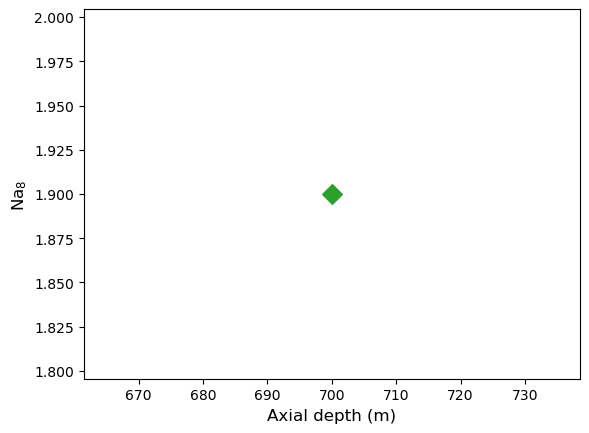

In [37]:
axial_depths = [700.0, ]
Na8 = [1.9, ]


fig, ax = plt.subplots(dpi=100)

ax.scatter(axial_depths, Na8, c='C2', s=100)

ax.set_xlabel('Axial depth (m)')
ax.set_ylabel('Na$_8$')

plt.show()

## 4. Modelling the global array

It has been suggested that the global array you have just obtained a version of is controlled by variations in mantle temperature. By constructing a simple model, we can test whether this is a feasible explanation.

We will add a line to the plot above where each point on the line represents a different value of $T_p$.

The model will need to take mantle potential temperature $T_p$ as an input, and estimate the Na>sub>2</sub>O content of the primary melt and the axial depth of the ridge. In the lectures we have covered the equations needed to do this. The first step is to calculate the melt fraction generated for a given $T_p$ at a spreading centre. There are many ways of doing this (including reading numbers off the figures from the lecture!), but there is a convenient python package that can help us:

In [38]:
import pyMelt as m

The way the [pyMelt](https://pymelt.readthedocs.io/en/latest/) package is structured requires us to define a mantle lithology and build a mantle object from it:

In [39]:
# Only need to run this once!
lz = m.lithologies.matthews.klb1()
mantle = m.mantle([lz], [1.0], ['lz'])

This tells pyMelt to use a set of equations that paramterise KLB1 lherzolite melting published by [Matthews et al. (2021)](https://doi.org/10.1029/2020GC009157). Then we can perform an adiabatic melting calculation at a given $T_p$ (in ˚C), and produce a plot to visualise the results:

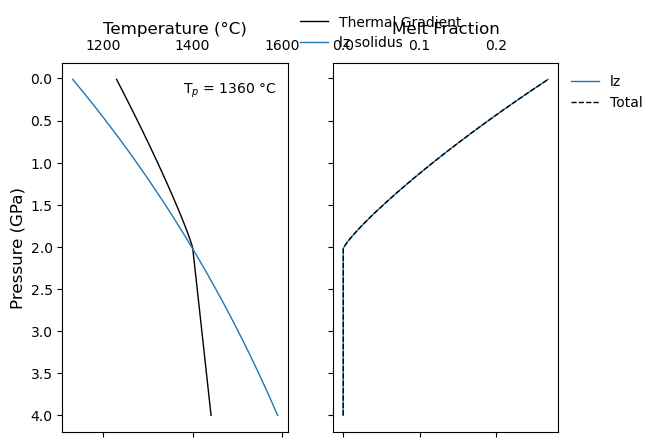

In [48]:
# This line does the calculation:
column = mantle.adiabaticMelt(1360.0, Pstart=4.0)

# This line makes a nice plot
f, a = column.plot()

### Q4.1: Find in your lecture notes the equation for obtaining crustal thickness from the information plotted above. Can you make a rough estimate of what it should be?

*Your answer here...*

In [61]:
column.P

0      3.99915
1      3.99515
2      3.99115
3      3.98715
4      3.98315
        ...   
993    0.02715
994    0.02315
995    0.01915
996    0.01515
997    0.01115
Name: P, Length: 998, dtype: float64

In [67]:
sum(column.F) * 10 * 3 *4 / 1000

7.3102964276341265

We can have pyMelt do the calculation too, but first we must tell it to creating a spreading centre:

In [65]:
mor = m.geosettings.spreadingCentre(column)
ref_tc = mor.tc
ref_tc

np.float64(6.927764192167202)

### Q4.2: Does the calculated value differ from your own answer? Why?

*Your answer here...*

We expect that mid-ocean ridges are close to isostatic equilibrium, so variations in axial depth should be driven by density differences in the rock beneath them. There will be two main components to this: i) variations in crustal thickness and ii) variations in mantle temperature. To make the calculations easier we will ignore the contribution of mantle temperature and focus on crustal thickness.

### Q4.3: Derive an expression linking a change in ridge bathymetry to a change in crustal thickness.

*Assume uniform densities (values below) for the crust, ocean, and mantle.*

| Material | Density (kg m<sup>-3</sup>) |
|---|---|
| Water | 1000 |
| Crust | 3000 |
| Convecting Mantle | 3300 |

depth = -thickness(Pc-Pm)/(Pw-Pm)

Using pyMelt we can calculate the thickness of oceanic crust as a function of mantle $T_p$, and therefore the change in bathymetry from a reference value. We will use a $T_p$ of 1360˚C as the reference case (for which we calculated the crustal thickness above).

### Q4.4: By modifying the code below, create a loop that calculates the crustal thickness for a range of $T_p$:

In [73]:
# Create an empty list to store the answers in
tcs = []

# This is for Q4.6:
Fmax = []

for Tp in np.linspace(1300, 1550, 60): # Run the code below for 6 values of Tp spaced evenly between 1300 and 1550. Increase this is you want!
    column_c = mantle.adiabaticMelt(Tp, Pstart=4.0) 
    mor_c = m.geosettings.spreadingCentre (column_c) 
    tcs.append(mor_c.tc)

    # Code for Q4.6 can go here:
    F_max = mor_c.F.max()
    Fmax.append(F_max)


print(tcs)

/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Documents/Academic/Coding/.conda/lib/python3.11/site-packages/pyMelt/mantle_class.py:450: UserWarning: Super solidus start
  _warn("Super solidus start")
/Users/th/Docume

[np.float64(3.5412736870509636), np.float64(3.73423275119023), np.float64(3.945302233508568), np.float64(4.151858538939672), np.float64(4.374470785796196), np.float64(4.599027145136095), np.float64(4.819760203242467), np.float64(5.054889540607047), np.float64(5.29688158447493), np.float64(5.5424115560133504), np.float64(5.8070775061850455), np.float64(6.059878446375262), np.float64(6.3316113274277726), np.float64(6.597194052045379), np.float64(6.882628824947471), np.float64(7.1674421208468555), np.float64(7.462621489421838), np.float64(7.7603011409949705), np.float64(8.055956396359699), np.float64(8.377550992944778), np.float64(8.684710111884064), np.float64(9.018573616245096), np.float64(9.349623970919911), np.float64(9.690600792099714), np.float64(10.032315659782547), np.float64(10.383923041747659), np.float64(10.729621928857592), np.float64(11.099535133420341), np.float64(11.4788716346964), np.float64(11.854439839840678), np.float64(12.220009216538351), np.float64(12.592231514610177

We can convert this to a numpy array to make calculations easier:

In [69]:
tcs = np.array(tcs)
Fmax = np.array(Fmax)

### Q4.5: Now use the expression you derived above to calculate the bathymetry relative to the $T_p$ = 1360˚C case:

In [ ]:
# Your code here...


We must now calculate the primary Na<sub>2</sub>O content of the magmas associated with each $T_p$.

If we use a highly simplified melting model, the Na<sub>2</sub>O content of the mantle melts can be calculated from the following expression for accumulated fractional melts which was developed by [Plank et al., 1995](https://agupubs.onlinelibrary.wiley.com/doi/abs/10.1029/95JB01148), a paper which is worth a look.

$$
C_L = \frac{2C_0}{X_{max}} \left[ 1 + \frac{D \left[ (1 - X_{max})^{((1/D) - 1))} -1 \right]}{X_{max}(D+1)} \right]
$$

In this case, $C_L$ is the liquid composition, $C_0$ is the mantle source composition (you can try 0.3 wt% for Na<sub>2</sub>O and $D$, the partition coefficient during melting (try a constant of 0.01 for Na).

You can extract the melt fraction at the top of the melting column (i.e., the maximum melt fraction) from the pyMelt results using:

In [70]:
mor.F.max()

np.float64(0.23304347465452885)

### Q4.6: Add Fmax into the loop above so you extract Fmax and crustal thickness at the same time. Check Fmax makes sense.

In [ ]:
# Print Fmax here.

### Q4.7: Use these values of Fmax to calculate Na<sub>2</sub>O of the magma produced for each $T_p$:

In [ ]:
# Your code here

### Q4.8: Create a version of the global array plot with the model superimposed.

*Remember that the bathymetrys calculated are **relative** bathymetrys. You will need to add an offset to it to match the data.

NameError: name 'relative_bathymetry' is not defined

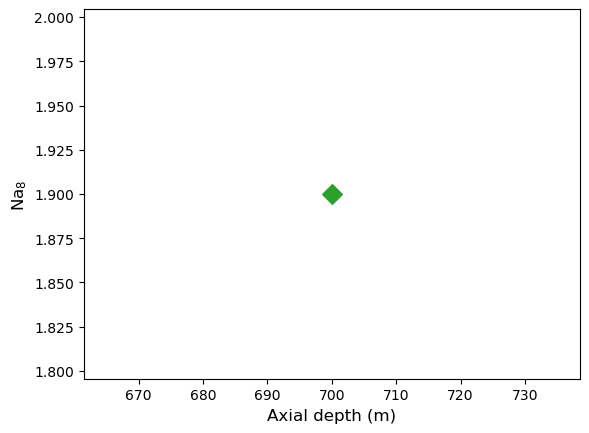

In [74]:
fig, ax = plt.subplots(dpi=100)

ax.scatter(axial_depths, Na8, c='C2', s=100)

ax.set_xlabel('Axial depth (m)')
ax.set_ylabel('Na$_8$')


ax.plot(relative_bathymetry*1000 + 3500, Na2O)

plt.show()

### Q4.9: What range of $T_p$ is required to explain the global array? What might affect your answer?

*Your answer here...*